In [236]:
#train a phishing detection model using a neural network mlp classifier
#using the features extracted from the phishing urls


In [237]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [238]:
#put the dataset_phishing.csv file in a pandas dataframe

df = pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [239]:
#checking the number of rows and columns and descriptive statistics
df.shape

(11430, 89)

In [240]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [242]:
#make the last row which is qualitative data(legitimate or phishing) into a quantitative data 0 and 1

df['status'] = df['status'].map({'legitimate':0, 'phishing':1})
df.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


In [243]:
corr_matrix = df.corr()

In [244]:
corr_matrix.shape

(88, 88)

In [245]:
corr_matrix 

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [246]:
corr_matrix['status']

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [247]:
status_corr = corr_matrix['status']

In [248]:
#function that select the features above a certain threshold for correlation, return df_feauters with correlation score

def select_features(df, threshold):
    corr_matrix = df.corr()
    corr_matrix = corr_matrix["status"]
    corr_matrix = corr_matrix[corr_matrix > threshold]
    df_selected_features = corr_matrix.drop("status")
    df_selected_features = pd.DataFrame(df_selected_features)
    return df_selected_features

    


In [249]:
df_features = select_features(df, 0.1)
df_features, df_features.shape

(                      status
 length_url          0.248580
 length_hostname     0.238322
 ip                  0.321698
 nb_dots             0.207029
 nb_at               0.142915
 nb_qm               0.294319
 nb_and              0.170546
 nb_eq               0.233386
 nb_slash            0.242270
 nb_semicolumn       0.103554
 nb_com              0.156284
 https_token         0.114669
 ratio_digits_url    0.356395
 ratio_digits_host   0.224335
 tld_in_subdomain    0.208884
 abnormal_subdomain  0.128160
 nb_subdomains       0.112891
 prefix_suffix       0.214681
 shortening_service  0.106120
 length_words_raw    0.192010
 shortest_word_host  0.223084
 longest_words_raw   0.200147
 longest_word_host   0.124516
 longest_word_path   0.212709
 avg_words_raw       0.167564
 avg_word_host       0.193502
 avg_word_path       0.197256
 phish_hints         0.335393
 suspecious_tld      0.110090
 statistical_report  0.143944
 empty_title         0.207043
 domain_in_title     0.342807
 dns_recor

In [250]:
#show the names of the selected features without the status collumn
#put that in a list
features_list = df_features.index.tolist()
features_list


['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_slash',
 'nb_semicolumn',
 'nb_com',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'shortening_service',
 'length_words_raw',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'suspecious_tld',
 'statistical_report',
 'empty_title',
 'domain_in_title',
 'dns_record',
 'google_index']

In [251]:
X_selected = df[features_list]
X_selected

,length_url,length_hostname,ip,nb_dots,nb_at,nb_qm,nb_and,nb_eq,nb_slash,nb_semicolumn,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,suspecious_tld,statistical_report,empty_title,domain_in_title,dns_record,google_index
0,37,19,0,3,0,0,0,0,3,0,...,5.750000,7.00,4.500000,0,0,0,0,0,1,1
1,77,23,1,1,0,0,0,0,5,0,...,15.750000,19.00,14.666667,0,0,0,0,1,0,1
2,126,50,1,4,0,1,2,3,5,0,...,8.250000,8.40,8.142857,0,0,0,0,1,0,1
3,18,11,0,2,0,0,0,0,2,0,...,5.000000,5.00,0.000000,0,0,0,0,1,0,0
4,55,15,0,2,0,0,0,0,5,0,...,6.333333,5.00,7.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,4,0,...,7.750000,6.00,9.500000,0,0,0,0,0,0,0
11426,84,18,0,5,1,1,0,1,5,0,...,5.166667,6.50,4.900000,0,0,0,0,1,0,1
11427,105,16,1,2,0,1,0,1,5,0,...,6.153846,5.50,6.272727,0,0,0,0,0,0,1
11428,38,30,0,2,0,0,0,0,3,0,...,12.500000,12.50,0.000000,0,0,0,0,1,0,0


In [252]:
y = df['status']
y

0        0
1        1
2        1
3        0
4        0
        ..
11425    0
11426    1
11427    0
11428    0
11429    1
Name: status, Length: 11430, dtype: int64

In [253]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=40, shuffle=True)


In [254]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 34), (2286, 34), (9144,), (2286,))

In [255]:
X_train


,length_url,length_hostname,ip,nb_dots,nb_at,nb_qm,nb_and,nb_eq,nb_slash,nb_semicolumn,...,avg_words_raw,avg_word_host,avg_word_path,phish_hints,suspecious_tld,statistical_report,empty_title,domain_in_title,dns_record,google_index
9025,48,11,0,3,0,0,0,0,6,0,...,3.750000,3.00,4.0,0,0,0,0,0,0,0
9657,26,17,0,2,0,0,0,0,3,0,...,6.000000,6.00,0.0,0,0,0,0,0,0,0
7476,69,20,0,2,0,0,0,0,6,0,...,7.428571,7.50,7.4,1,1,0,0,1,0,1
4378,132,16,1,3,0,1,0,1,4,0,...,16.285714,5.50,20.6,0,0,0,0,1,0,0
2009,44,21,0,2,0,0,0,0,5,0,...,7.250000,8.00,6.5,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,45,34,1,4,0,0,0,0,3,0,...,6.000000,6.75,3.0,0,0,0,0,1,0,1
5959,30,22,0,1,0,0,0,0,3,0,...,18.000000,18.00,0.0,0,0,0,0,1,0,0
5426,33,25,0,2,0,0,0,0,3,0,...,10.000000,10.00,0.0,0,0,0,0,1,0,0
7608,32,24,0,2,0,0,0,0,3,0,...,9.500000,9.50,0.0,0,0,0,0,1,0,0


In [256]:
#standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [257]:
X_train

array([[-0.24595425, -0.93946311, -0.42123642, ..., -1.85790241,
        -0.14527742, -1.06815289],
       [-0.65657133, -0.37935027, -0.42123642, ..., -1.85790241,
        -0.14527742, -1.06815289],
       [ 0.14599841, -0.09929385, -0.42123642, ...,  0.5382414 ,
        -0.14527742,  0.93619557],
       ...,
       [-0.52592044,  0.36746686, -0.42123642, ...,  0.5382414 ,
        -0.14527742, -1.06815289],
       [-0.54458485,  0.27411472, -0.42123642, ...,  0.5382414 ,
        -0.14527742, -1.06815289],
       [-0.33927632,  1.39434041, -0.42123642, ...,  0.5382414 ,
        -0.14527742,  0.93619557]])

In [258]:
#do you need to create a neural network model for MLP classifier?

In [260]:
#train the dataset using a neural network mlp classifier

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver = 'sgd', alpha =0.001, hidden_layer_sizes=(300,300,300,300), max_iter=1000, random_state=40, verbose=True)
mlp.fit(X_train, y_train)



Iteration 1, loss = 0.65276345
Iteration 2, loss = 0.58206663
Iteration 3, loss = 0.52123103
Iteration 4, loss = 0.46458326
Iteration 5, loss = 0.41482171
Iteration 6, loss = 0.37324193
Iteration 7, loss = 0.34004102
Iteration 8, loss = 0.31439181
Iteration 9, loss = 0.29485342
Iteration 10, loss = 0.28030666
Iteration 11, loss = 0.26925190
Iteration 12, loss = 0.26083739
Iteration 13, loss = 0.25392639
Iteration 14, loss = 0.24836364
Iteration 15, loss = 0.24380133
Iteration 16, loss = 0.23965414
Iteration 17, loss = 0.23617763
Iteration 18, loss = 0.23292773
Iteration 19, loss = 0.23022021
Iteration 20, loss = 0.22771760
Iteration 21, loss = 0.22512427
Iteration 22, loss = 0.22291654
Iteration 23, loss = 0.22079639
Iteration 24, loss = 0.21889169
Iteration 25, loss = 0.21704602
Iteration 26, loss = 0.21535273
Iteration 27, loss = 0.21371207
Iteration 28, loss = 0.21204777
Iteration 29, loss = 0.21080882
Iteration 30, loss = 0.20895899
Iteration 31, loss = 0.20764957
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(300, 300, 300, 300),
              max_iter=1000, random_state=40, solver='sgd', verbose=True)

In [261]:
#print the confusion matrix accuracy, precision, recall and f1 score for the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("F1 score: ", f1_score(y_test, predictions))
    



[[1062   72]
 [  74 1078]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1134
           1       0.94      0.94      0.94      1152

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286

Accuracy:  0.9361329833770778
Precision:  0.9373913043478261
Recall:  0.9357638888888888
F1 score:  0.9365768896611643


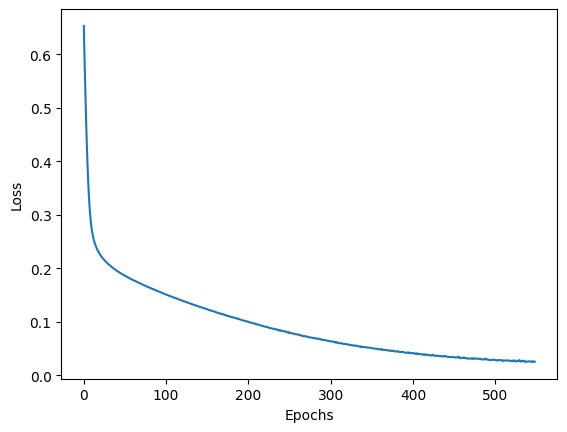

In [262]:
#plot the neural network model loss and accuracy

loss_values = mlp.loss_curve_
plt.plot(loss_values)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


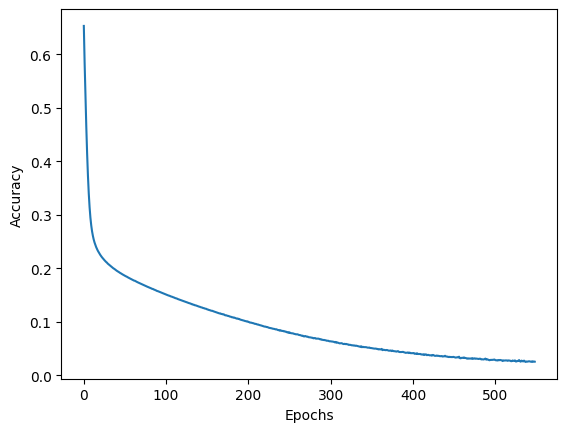

In [263]:
#plot the neural network model accuracy

plt.plot(mlp.loss_curve_)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()



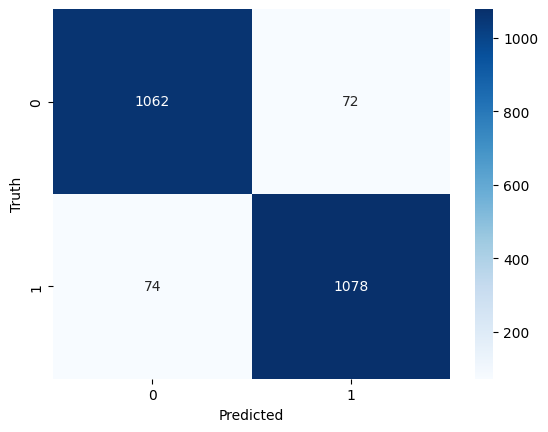

In [264]:
#plot the heat map of the confusion matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()





In [265]:
#save the model

import pickle

with open('model_MLP.pkl', 'wb') as file:
    pickle.dump(mlp, file)